In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

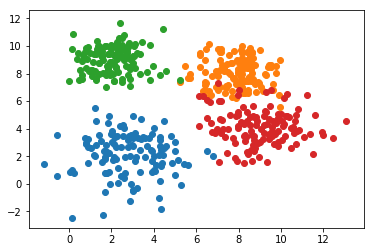

In [2]:
def createDataset(k, means, std, size=500):
    data = np.empty( (0,3) )
    for cluster in range(k):
        pts = np.random.normal(means[cluster], std[cluster], size=(size//k,2))
        pts = np.c_[pts, np.ones(size//k)*cluster ]
        data = np.append( data, pts, axis=0)
    np.random.shuffle(data)
    return data
data = createDataset( 4, [ (3,2), (8,8), (2,9), (9,4) ], [ 1.5, 1.1, 1, 1.4] )
for k in range(4):
    temp = data[:,0:2][data[:,2]==k]
    plt.scatter( temp[:,0], temp[:,1],  )

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split( data[:,0:2],data[:,2],test_size=0.2, stratify=data[:,2] )
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 2), (100, 2), (400,), (100,))

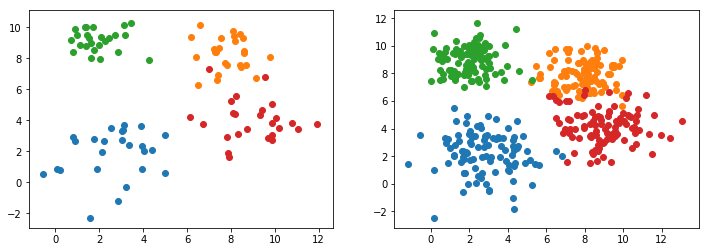

In [4]:
#our test data
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
for k in range(4):
    temp = X_test[Y_test==k]
    ax[0].scatter( temp[:,0], temp[:,1] )
for k in range(4):
    temp = X_train[Y_train==k]
    ax[1].scatter( temp[:,0], temp[:,1],  )

### MeanShift
> MeanShift is a centroid based heirarchical clustering algorithm.

> As opposed to K-Means, when using Mean Shift, you don’t need to know the number of categories (clusters) beforehand. The downside to Mean Shift is that it is computationally expensive — O(n²).

> Given a set of datapoints, the algorithm iteratively assign each datapoint towards the closest cluster centroid. The direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center.

> **Algorithm**
1. Define a window (bandwidth of the kernel) and place the window on a data point (Initially all points)
2. Calculate the mean for all the points in the window
3. Move the center of the window to the location of the mean
4. Repeat steps 2 and 3 until there is convergence.
5. In the end merge centroids which are close to each other in bandwith

In [5]:
def euclidean(X1,X2):
    return  np.sqrt(np.sum((X1-X2)**2, axis=1))

In [6]:
bandwidth = np.sqrt(np.sum(X_train.std(axis=0)**2))/X_train.shape[1]

In [7]:
def get_new_centroids(X,centroids):
    new_centroids = set()
    for centroid in centroids:
        new_centroids.add( tuple(X[euclidean(X,centroid)<bandwidth].mean(axis=0)) )
    return new_centroids

In [8]:
new_centroids = { tuple(center) for center in X_train}
old_centroids = set()
while old_centroids!=new_centroids
    old_centroids = new_centroids
    new_centroids = get_new_centroids(X_train,old_centroids)

In [9]:
centroids = np.array([ list(centroid) for centroid in new_centroids ] )
def mergeCentroids(centroids):
    avail = set()
    new_centroids = list()
    for centroid in centroids:
        mean_centroid = centroids[euclidean(centroids,centroid)<bandwidth].mean(axis=0)
        if tuple(mean_centroid) not in avail:
            avail.add(tuple(mean_centroid))
            new_centroids.append(mean_centroid)
    return np.array(new_centroids)
centroids = mergeCentroids(centroids)

In [10]:
def predict(X):
    dists = []
    for row in X:
        dists.append( euclidean(centroids,row) )
    return np.argmin(dists,axis=1)
label = predict(X_train)

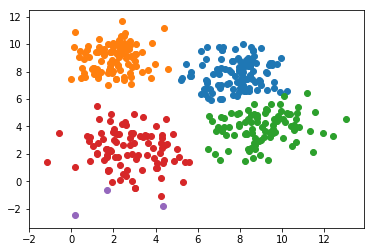

In [11]:
for k in range(len(np.unique(label))):
    temp = X_train[label==k]
    plt.scatter( temp[:,0], temp[:,1],  )